## INITIALIZATION

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

In [2]:
#lOADING DATASET 
df = pd.read_csv("data and pickle files/amazon_reviews_2019.csv",encoding="latin1") #due to special charas should be encoded as latin 1
#REMOVE MAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## SHAPE OF THE DATA AND ITS ATTRIBUTES

In [3]:
#TOTAL ROWS AND COLUMNS
n_reviews, n_attributes = df.shape
print('Total Reviews: ',n_reviews)
print('Total Attributes: ',n_attributes)

Total Reviews:  2501
Total Attributes:  32


> There are in total of 2.5k reviews within this dataset, which makes it to be a valid dataset since the records are more than 1k, thus suitable for analysis.

> However, it is to be noted that there are in total of 32 columns within this dataset, which is far more than what is required for this project. These columns need to be taken a deeper look for feature selection.

In [4]:
#INFORMATION ON THE LOADED CSV FILE. COVERS COLUMN NAMES, TOTAL ROWS AND COLUMS, DATA TYPES AND THE MEMORY USAGE.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   report_date             2501 non-null   object 
 1   online_store            2501 non-null   object 
 2   upc                     2501 non-null   float64
 3   retailer_product_code   2501 non-null   object 
 4   brand                   2501 non-null   object 
 5   category                2501 non-null   object 
 6   sub_category            2501 non-null   object 
 7   product_description     2501 non-null   object 
 8   review_date             2501 non-null   object 
 9   review_rating           2501 non-null   int64  
 10  review_title            2403 non-null   object 
 11  review_text             2501 non-null   object 
 12  is_competitor           2501 non-null   int64  
 13  manufacturer            2501 non-null   object 
 14  market                  2501 non-null   

In [5]:
#DISPLAY DATAFRAME
df.head()

,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,review_rating,review_title,review_text,is_competitor,manufacturer,market,matched_keywords,time_of_publication,url,review_type,parent_review,manufacturers_response,dimension1,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,1/2/2019,FRESHAMAZON,8.718110e+12,B0142CI6FC,Dove Men+Care,Personal Care,Deos,Dove Men+Care Extra Fresh Anti-perspirant Deod...,1/1/2019,5,Dove Mens + Deodorant,"As you get older, you know what you like and w...",0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RE...,Organic,Child,NaN,Deos,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,1/3/2019,FRESHAMAZON,5.000180e+12,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,1/2/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/R1...,Organic,Child,NaN,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315
2,1/3/2019,FRESHAMAZON,5.000180e+12,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,1/2/2019,4,Vitamin B12.,Excellent,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RD...,Organic,Child,NaN,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,e58a523d-0155-a366-f107-7ac6817ac3b7
3,1/3/2019,FRESHAMAZON,8.712570e+12,B014DFKELC,Knorr,Foods,Savoury,Knorr Beef Stock Pot 8 x 28g,1/2/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/R2...,Organic,Parent,NaN,Savoury,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,aaa9bb87-4f99-bb89-65cb-3b400ebb45c0
4,1/3/2019,FRESHAMAZON,8.717160e+12,B014G37I7E,Cif,Homecare,HHC,Cif Citrus Bathroom Mousse 500ml,1/2/2019,5,Very handy,Does what is says it does,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RJ...,Organic,Parent,NaN,HHC,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core,False,0,48c71b34-d7fe-5e90-51dd-239e153fb0ae


## SUMMARY STATISTICS 

> useful to understand the average values acorss the dataset, and make useful insights regarding its conents. For numerical values, it can aid us in understanding what the max/min values are, and understand the mean values, whilst subsequently understanding if there are any NULL values across the board. 

> As for the objects, it can aid us in identifying the unique values within the dataset, and how many instances a certain word or character within the columns.

In [6]:
#NON-OBJECTS
df.describe()

,upc,review_rating,is_competitor,matched_keywords,time_of_publication,manufacturers_response,dimension4,dimension5,dimension6,helpful_review_count
count,2.501000e+03,2501.000000,2501.0,0.0,0.0,0.0,0.0,0.0,0.0,2501.000000
mean,7.632298e+12,4.456218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.231507
std,2.108171e+12,1.108595,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.953930
min,4.218266e+07,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,8.710450e+12,4.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8.710450e+12,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,8.712560e+12,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
max,8.722700e+12,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


1. the average review within this dataset happen to be positive, which can be seen from the high rating of 4.4. The min rating is 1 and the max is 5, 1 being very poor and 5 being excellent. 
2. most of the reviews within this dataset has not had a helpful review count given to them, which can be seen from the low average of 0.2. 
3. UPC is a unique identifier, and hence will be ignored in this summary stats
4. is_competitor column displays that there happens to be no values indicating that there is anything flagged as a competitor. This can be confirmed by both the min and max values being 0, and hence the average value being 0.
5. matched_keywords,	time_of_publication,	manufacturers_response,	dimension4,	dimension5,	dimension6 all have NULL values entirely.

In [7]:
#OBJECTS
df.describe(include=object)

,report_date,online_store,retailer_product_code,brand,category,sub_category,product_description,review_date,review_title,review_text,manufacturer,market,url,review_type,parent_review,dimension1,dimension2,dimension3,dimension7,dimension8,review_hash_id
count,2501,2501,2501,2501,2501,2501,2501,2501,2403,2501,2501,2501,1654,2501,2501,2501,2501,2310,2499,2501,2501
unique,133,9,367,35,4,16,219,144,1244,1622,1,1,1571,2,2,16,106,94,15,1,2501
top,5/26/2019,AMAZON,B077YLQ2R1,Comfort,Personal Care,Laundry,Simple x Little Mix Micellar Cleansing Wipes 2...,2/19/2019,Great value,Good,Unilever Global,UK,https://www.sainsburys.co.uk/shop/gb/groceries...,Organic,Parent,Laundry,COTC Fabric Conditioner,COTC Fabric Conditioner,Retailer Core of the Core,Core of the Core,3f129b02-ea76-0323-bd59-235d97a4f83f
freq,217,1102,97,480,1182,993,108,70,48,25,2501,2501,52,1936,1800,993,326,276,1281,2501,1



1. there are in total of 9 stores present in the dataset, most of which are from AMAZON store itself. Most of the stores present happen to be major outlet stores within the UK.
2. most of the data happens to come from the category of Personal Care, under the Laundry section of the brand Comfort. 
3. the reviews where there are mostly positive values can be seen to have "Good" in the review_text and "great value" written in it, indicating that within the positive reviews have similar wording in them. can be confirmed the more we look into it. 
4. throught the dataset, there happened to me one manufacturer - Unilever Global
5. market happen to only be in UK.
6. There are two types of reviews, most of them being organic and parent reviews.
7. dimensions 1 - 8 displays extra information on the product itself, as confirmed. most of them happen to be laundry products.
8. review_hash_id: this can be ignored since it is a unique identifier.

In [8]:
df["review_type"].value_counts(normalize=True).to_frame()

,review_type
Organic,0.77409
Syndicated,0.22591


Most of the reviews happen to be organic (77%) and the syndicated reviews, which are reffered to reviews of the same product which were shared accorss multiple platforms for higher accessibility, is the minimum (22%).

In [9]:
df["parent_review"].value_counts(normalize=True).to_frame()

,parent_review
Parent,0.719712
Child,0.280288


Most of the reviews are said to be parent reviews. Upon further research, it is unclear what this stands for, and hence might be dropped due to is ambiguity.

In [15]:
df["review_date"].value_counts().to_frame()

,review_date
2/19/2019,70
1/26/2019,49
2/1/2019,47
2/20/2019,46
5/1/2019,40
2/26/2019,39
1/31/2019,38
2/18/2019,36
1/14/2019,36
1/27/2019,35


In [11]:
df["report_date"].value_counts().to_frame()

,report_date
5/26/2019,217
2/28/2019,201
5/27/2019,134
3/25/2019,122
3/21/2019,81
2/22/2019,56
5/23/2019,55
3/22/2019,50
2/8/2019,39
3/24/2019,37


The years of the reviews  on this dataset consists of 2019 only.

In [20]:
df.groupby('category')['sub_category'].value_counts().sort_index(ascending=True).to_frame()

sub_category
category      sub_category                               
Foods         Dressings                                36
              Ice Cream                                39
              Other Foods                              16
              Savoury                                 100
Homecare      HHC                                      27
              Household Care                           30
              Laundry                                 993
Personal Care Deodorants & Fragrances                 125
              Deos                                    100
              Hair                                    108
              Hair Care                                77
              Personal Care                            22
              Skin Care                               476
              Skin Cleansing                          274
Refreshment   Ice Cream                                70
              Tea                                       3
              Tea and Soy & Fruit Beverages             5

The sub-categories, grouped by the categories accordingly. 

Upon closer inspection, there are multiple categories which are overlapping or indicate that they mean the same thing, but are written in differently e.g Hair and Hair care, Deos and Deodorants & Fragrances, or having same sub_categories but different categories e.g Ice Cream under Refreshment and Foods.

needs to be handled since this can be useful for further EDA analysis

In [21]:
#CHANGING THE CATEGORIES AND SUB-CATEGORIES
df.loc[df.sub_category == "Ice Cream", "category"] = "Refreshment"

In [22]:
df.loc[df.sub_category == "HHC", "sub_category"] = "Household Care"

In [23]:
df.loc[df.sub_category == "Deos", "sub_category"] = "Deodorants & Fragrances"

In [24]:
df.loc[df.sub_category == "Tea", "sub_category"] = "Tea and Soy & Fruit Beverages"

In [25]:
#df.loc[(df['sub_category'] == "Hair Care") & (df['category'] == "Personal Care")]
df.loc[df.sub_category == "Hair Care", "sub_category"] = "Hair"

In [28]:
df.groupby('category')['sub_category'].value_counts().sort_index(ascending=True).to_frame()

sub_category
category      sub_category                               
Foods         Dressings                                36
              Other Foods                              16
              Savoury                                 100
Homecare      Household Care                           57
              Laundry                                 993
Personal Care Deodorants & Fragrances                 225
              Hair                                    185
              Personal Care                            22
              Skin Care                               476
              Skin Cleansing                          274
Refreshment   Ice Cream                               109
              Tea and Soy & Fruit Beverages             8

Everything is now sorted and hence can be used for EDA analysis accordingly.

In [33]:
df["online_store"].value_counts().to_frame()

,online_store
AMAZON,1102
AMAZONPRIMEPANTRY,389
BOOTS,378
SUPERDRUG,188
OCADO,168
SAINSBURYS,123
ASDA,109
FRESHAMAZON,40
MORRISONS,4


Most comes from AMAZON store, and most of them are stores from the UK.

The majority of the reviews have not been awarded with a helpful review, and if there have been it has been extremely low. Hence, this may skew the results of the reviews itself, and thus would not be helpful in identifying the fake reviews of this dataset

## CHECKING FOR NULL AND DUPLICATED VALUES

In [35]:
#CHECKING THE NUMBER OF NULL VALUES ACROSS THE DATASET
df.isnull().sum()

report_date                  0
online_store                 0
upc                          0
retailer_product_code        0
brand                        0
category                     0
sub_category                 0
product_description          0
review_date                  0
review_rating                0
review_title                98
review_text                  0
is_competitor                0
manufacturer                 0
market                       0
matched_keywords          2501
time_of_publication       2501
url                        847
review_type                  0
parent_review                0
manufacturers_response    2501
dimension1                   0
dimension2                   0
dimension3                 191
dimension4                2501
dimension5                2501
dimension6                2501
dimension7                   2
dimension8                   0
verified_purchase            0
helpful_review_count         0
review_hash_id               0
dtype: i

Just as mentioned previously, there are NULL values within this dataset which needs to be taken care of. 

1. review_title has 98 NULL values, which is the minority considering there are over 2k records. 
2. URL has 800+ missing values, which can be ignored since this is not significant to the nature of our project
3. matched_keywords, time_of_publication, manufacturers_response, dimension4, dimension5, dimension6 don't have any values in them, and hence will most definately be dropped. 
4. dimension 7 has 2 missing values, and from above it can be seen that it contains just an extra info on the product.

**There are no NULL values for review_rating, review_text, and verified_purchase, which are the main attributes needed for the analysis.**

In [37]:
#DISPLAYS THE NUMBER OF DUPLICATED VALUES
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  0


There are no duplicated records within this dataset, therefore this step will be skipped.

### VERDICT SO FAR...

>There is a lack of behavioral attributes in relation to the reviews itself. There is no information regarding the author, the time of the review written, the collection of the reviews written by the same author, and hence behavioral context cannot be utlized to determine the fake reviews of this project. 
 

### TEXTUAL ATTRIBUTES

In [22]:
#TEXTUAL ATTRIBUTES
cols = ['review_date','review_title', 'review_text','review_rating','verified_purchase']
textual_attributes = df[cols]
pd.DataFrame(textual_attributes).head()

,review_date,review_title,review_text,review_rating,verified_purchase
0,1/1/2019,Dove Mens + Deodorant,"As you get older, you know what you like and w...",5,True
1,1/2/2019,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,5,True
2,1/2/2019,Vitamin B12.,Excellent,4,True
3,1/2/2019,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,5,True
4,1/2/2019,Very handy,Does what is says it does,5,False



>There are textual attributes available within this dataset, and on top of that there are no NULL values within them as displayed above, and hence textual attributes can be used to understand the textual context of these reviews, so by the time we are building the classifier, we have a better undersranding on the review data itself. 

> essentially the textual attributes can aid us in approaching the problem in a linguistic features fashion, where The linguistic feature considers review text to identifythe reviews as fake vs truth

>the attributes above will be used to further our understanding in our EDA process.

### OTHER ATTRIBUTES

In [23]:
#DIMENSIONS 1 - 8
cols = ['dimension1', 'dimension2','dimension3','dimension4','dimension5', 'dimension6','dimension7','dimension8']
dimensions = df[cols]
pd.DataFrame(dimensions).head()

,dimension1,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8
0,Deos,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core
1,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core
2,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core
3,Savoury,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core
4,HHC,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core


>The rest of the attributes are considered to be extra information, which has aided us in understanding the background information on the reviews and the products itself. For instance, dimensions 1 - 8 were extra information on the product itself, and although it aided us in understanding the context of the product, it would not be helpful in identifying the fake reviews from the truth reviews.

## EXPLORATORY DATA ANALYSIS 

In [24]:
#SETTING SEABORN STYLE
sns.set_style('darkgrid')

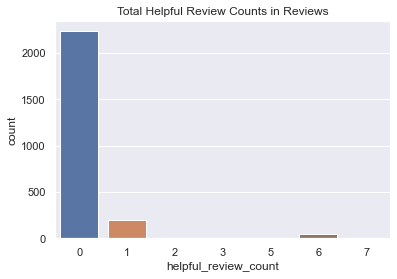

In [25]:
#COUNTPLOT ON TOTAL HELPFUL_REVIEW_COUNTS
sns.countplot(x ='helpful_review_count', 
              data = df).set_title("Total Helpful Review Counts in Reviews")
plt.show()

In normal basis, helpful_review_count can aid us in understanding which reviews has helped users in purchases a product. However for this dataset, it can be observed that most of the reviews have 0 helpful review count, and others having a miniscule amount of helpdul reviews given. In this case, this will actually skew our understanding in identifying which reviews are fake and which ones are real, and therefore to eliminate bias, this column will not be considered for our model building.

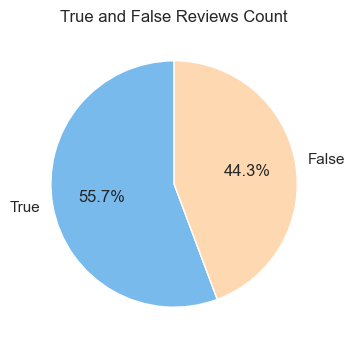

In [45]:
#PIE CHART ON VERFIED PURCHASES - check one
colors = ['#79BAEC','#FED8B1']
plt.figure(figsize=(4,4))
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=12)
plt.show()

Verified_purchases column is the target variable for this project. From the countplot above, it can be seen that there are near equal parts of true VP and false VP (56% and 44% respectively). 

Amazon has provided their solution to combat fake reviews by implementing this column, Verified Purchases, where the reviewer has to go through a series of verification steps to ensure that the review that they are placing has indeed been bought from the site. This is Amazon's answer to combating fake reviews, and thus provides security on the truthfulness of the reviews since the review has been placed after purchasing the products. 


Text(0.5, 1.0, 'Review_Rating Grouped by Verified_Purchase')

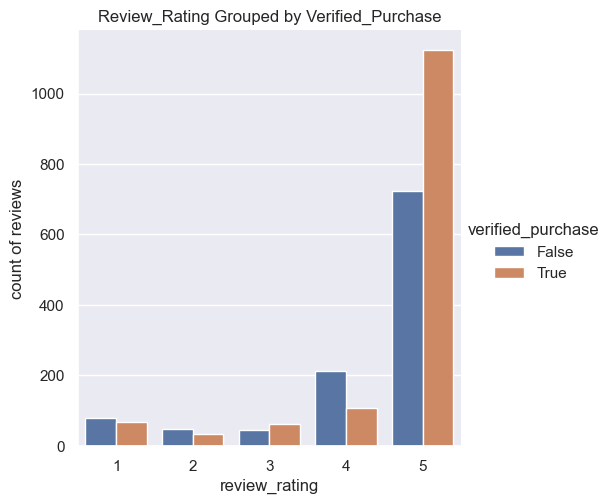

In [55]:
#COUNTPLOT OF REVIEW RATING GROUPED BY VERIFIED PURCHASE
# print(df.head())
sns.catplot(x ='review_rating',kind="count", hue="verified_purchase",
            data=df)
plt.xlabel("review_rating")
plt.ylabel("count of reviews")
plt.title("Review_Rating Grouped by Verified_Purchase")

Text(0.5, 1.0, 'Count of Product Categories')

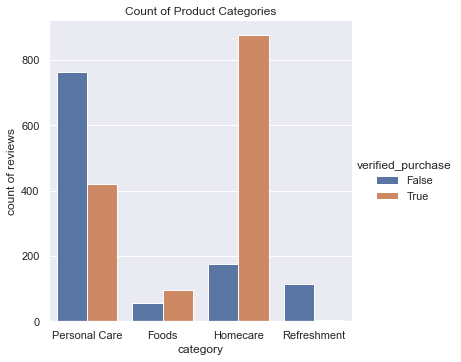

In [28]:
sns.catplot(x ='category',kind="count", hue = "verified_purchase", data=df)
plt.xlabel("category")
plt.ylabel("count of reviews")
plt.title("Count of Product Categories")

Text(0.5, 1.0, 'Count of Product Sub Categories')

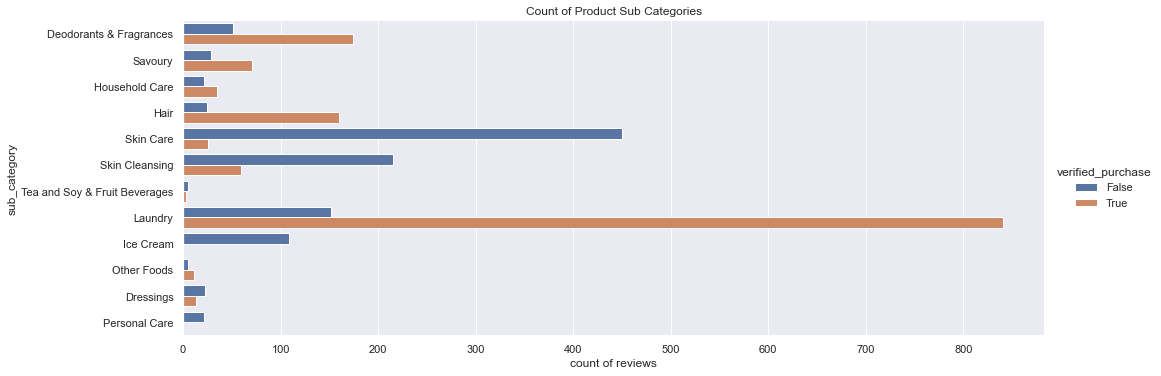

In [29]:
sns.catplot(y ='sub_category',kind="count", hue = "verified_purchase", data=df,  height=5, aspect=3)
plt.ylabel("sub_category")
plt.xlabel("count of reviews")
plt.title("Count of Product Sub Categories")

### REVIEW TEXT EDA

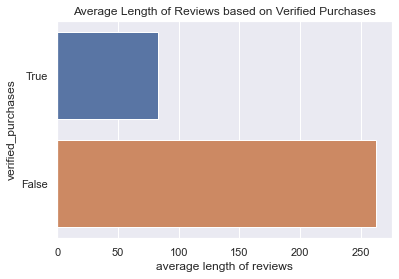

In [30]:
cols = ["verified_purchase", "review_text"]
vprt = df[cols] #making a subset of the dataframe-

#FILTERING BASED ON TRUE AND FALSE VP
checkTrue = vprt["verified_purchase"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified_purchase"] == False
filtered_false = vprt[checkFalse]


#AVERAGE REVIEW LENGTH BASED ON TRUE AND FALSE VP
false_average_length = filtered_false["review_text"].apply(len).mean()
true_average_length = filtered_true["review_text"].apply(len).mean()

#PLOTTING THE GRAPH
x = [true_average_length,false_average_length]
y = ["True", "False"]
sns.barplot(x, y)
plt.xlabel("average length of reviews")
plt.ylabel("verified_purchases")
plt.title("Average Length of Reviews based on Verified Purchases")
plt.show()

One of the key takeaways from this graph is the fact that the average length of the false values happened to exceed the ones which are flagged as verified. This can be backed up by several posts, noteably a site which specilizes in catching fraudulent reviews, where it was mentioned that the average length of these reviews tend to exceed the normal length compared to legitimate reviews. 

We can see here that the average length of the false VP happen to be more than 250 characters, whilst the true VP happens to be around 50 - 100 characters.

In [31]:
#DROP AFOREMENTIONED COLUMNS
df.drop(['matched_keywords', 'time_of_publication'
         ,'manufacturers_response', 'dimension4',
         'dimension5', 'dimension6', 
         'is_competitor', 'helpful_review_count',
        'report_date','online_store','brand',
         'category','sub_category', 'market',
        'upc', 'retailer_product_code', 'review_hash_id', 
         'url','product_description', 'parent_review', 
         'review_type', 'manufacturer', 'dimension1', 
         'dimension2','dimension3','dimension4',
         'dimension5', 'dimension7', 
         'dimension8'], axis=1, inplace=True)
df.head() #UPDATED DATAFRAME

,review_date,review_rating,review_title,review_text,verified_purchase
0,1/1/2019,5,Dove Mens + Deodorant,"As you get older, you know what you like and w...",True
1,1/2/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,1/2/2019,4,Vitamin B12.,Excellent,True
3,1/2/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,1/2/2019,5,Very handy,Does what is says it does,False


In [32]:
#SAVING UPDATED DATAFRAME AS .csv FILE
df.to_csv('data and pickle files/updated_data.csv')